In [6]:
import numpy as np
import math
import matplotlib.pyplot as plt
from sympy import symbols, simplify, expand, lambdify, Float, pretty

In [2]:

def diferencas_finitas(y_vals):
    """Calcula a tabela de diferenças finitas progressivas."""
    n = len(y_vals)
    diff_table = [y_vals.copy()]
    for i in range(1, n):
        nova_linha = [diff_table[i-1][j+1] - diff_table[i-1][j] for j in range(n - i)]
        diff_table.append(nova_linha)
    return diff_table

In [7]:
def interpolacao_gregory_newton(x_vals, y_vals):
    """
    Aplica o método de interpolação de Gregory-Newton progressivo.
    """
    x = symbols('x')
    h = x_vals[1] - x_vals[0]
    t = (x - x_vals[0]) / h

    diff_table = diferencas_finitas(y_vals)
    n = len(x_vals)
    polinomio = 0
    termo_t = 1

    for i in range(n):
        polinomio += diff_table[i][0] * termo_t / math.factorial(i)
        termo_t *= (t - i)

    polinomio = simplify(expand(polinomio))
    coeffs = polinomio.as_poly(x).all_coeffs()
    arredondados = [Float(c.evalf(), 4) for c in coeffs]
    polinomio = sum(c * x**i for i, c in enumerate(reversed(arredondados)))

    f_interp = lambdify(x, polinomio, 'numpy')
    return polinomio, f_interp

Interpolação de Gregory-Newton

Polinômio interpolador de Gregory-Newton:
         4          3          2                   
- 206.7⋅x  + 358.0⋅x  - 179.9⋅x  + 35.27⋅x - 0.8153
Para x = 0.4500, y estimado = 2.7732


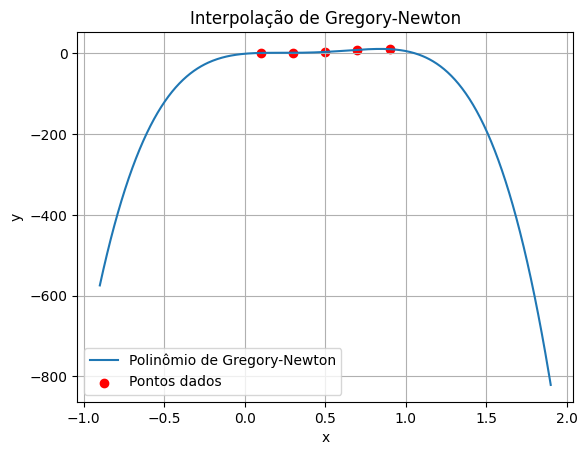

In [8]:
# Interpolação de Gregory-Newton
print("Interpolação de Gregory-Newton")
n = int(input("Digite o número de pontos (n): "))
x_vals = []
y_vals = []

for i in range(n):
    x = float(input(f"x{i}: "))
    y = float(input(f"y{i}: "))
    x_vals.append(x)
    y_vals.append(y)

if not np.allclose(np.diff(x_vals), x_vals[1] - x_vals[0]):
    raise ValueError("Os valores de x devem ser igualmente espaçados para Gregory-Newton.")

P, f_interp = interpolacao_gregory_newton(x_vals, y_vals)

print("\nPolinômio interpolador de Gregory-Newton:")
print(pretty(P, use_unicode=True))

# Loop de aproximação de y dado x
while True:
    entrada = input("\nDigite um valor de x para estimar y (ou 'sair' para encerrar): ")
    if entrada.lower() == 'sair':
        break
    try:
        x_input = float(entrada)
        y_aproximado = f_interp(x_input)
        print(f"Para x = {x_input:.4f}, y estimado = {y_aproximado:.4f}")
    except Exception as e:
        print("Erro ao processar entrada:", e)

# Avaliação gráfica
x_plot = np.linspace(min(x_vals) - 1, max(x_vals) + 1, 500)
y_plot = f_interp(x_plot)

plt.plot(x_plot, y_plot, label='Polinômio de Gregory-Newton')
plt.scatter(x_vals, y_vals, color='red', label='Pontos dados')
plt.title('Interpolação de Gregory-Newton')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.legend()
plt.show()